<a href="https://colab.research.google.com/github/Amar098K/Moisture-Damage-Evaluation/blob/main/changed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Amar098K/Moisture-Damage-Evaluation.git

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


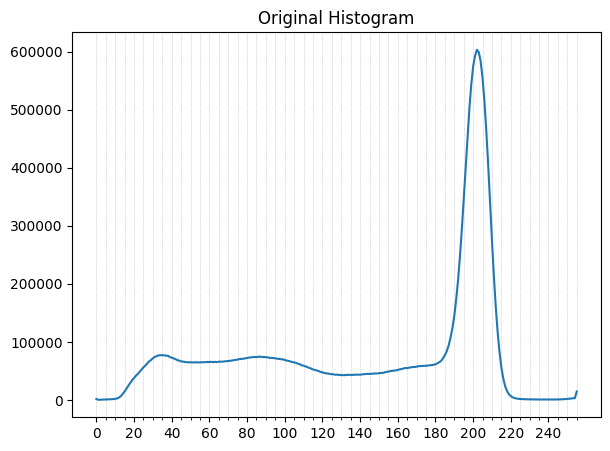

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/VG40 New/Sample_1 24h/DSCN7287.JPG', 0)

hist, bins = np.histogram(img.flatten(), 256, [0, 256])

plt.figure(figsize=(15, 5))

plt.subplot(121)
major_x_ticks = np.arange(0, 256, 20)
plt.plot(hist)
plt.xticks(major_x_ticks)
plt.title('Original Histogram')
minor_x_ticks = np.arange(0, 256, 5)
plt.gca().set_xticks(minor_x_ticks, minor=True)
plt.grid(which='both', axis='x', linestyle=':', linewidth=0.5)

plt.show()


In [ ]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/VG40 New/Sample_1 24h/DSCN7287.JPG')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary mask
_, thresh = cv2.threshold(gray, 221, 255, cv2.THRESH_BINARY_INV)

# Perform erosion and dilation to remove small white spots
kernel = np.ones((5,5), np.uint8)
eroded = cv2.erode(thresh, kernel, iterations=1)
dilated = cv2.dilate(eroded, kernel, iterations=1)
# Apply the mask to the original image
result = cv2.bitwise_and(img, img, mask=dilated)

# Show the result
#cv2_imshow(result)

cv2.imwrite('output.jpg',result)

True

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


#cv2.waitKey(0)
#cv2.destroyAllWindows()


img = cv2.imread('/content/output.jpg')
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
a_channel = lab[:,:,1]
th = cv2.threshold(a_channel,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
masked = cv2.bitwise_and(img, img, mask = th)    # contains dark background
m1 = masked.copy()
m1[th==0]=(255,255,255)

#cv2_imshow(m1)
cv2.imwrite('my_img2.jpg', m1)


#import numpy as np
#import cv2
sample_image = cv2.imread('/content/my_img2.jpg')
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
attempts=10
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))



cv2.imwrite('my_img3.jpg',result_image)

import cv2
import numpy as np

# Read the image
in_path = '/content/my_img3.jpg'
CImage = cv2.imread(in_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(CImage, cv2.COLOR_BGR2GRAY)



# Count the number of white, black, and grey pixels
white = np.sum(gray_image == 255)
black = np.sum(gray_image < 50)
grey = np.sum((gray_image >= 50) & (gray_image < 255))
total = gray_image.size

print('Number of white pixels:', white)
print('Number of black pixels:', black)
print('Number of grey pixels:', grey)
print('Total number of pixels:', total)
sum = black+grey
strip = (grey/sum)*100
coated = (black/sum)*100
print('Total area of stripping is:',strip)
print('Total area of coated is:',coated)

Number of white pixels: 12413980
Number of black pixels: 3872711
Number of grey pixels: 3868701
Total number of pixels: 20155392
Total area of stripping is: 49.97410033208412
Total area of coated is: 50.02589966791587
